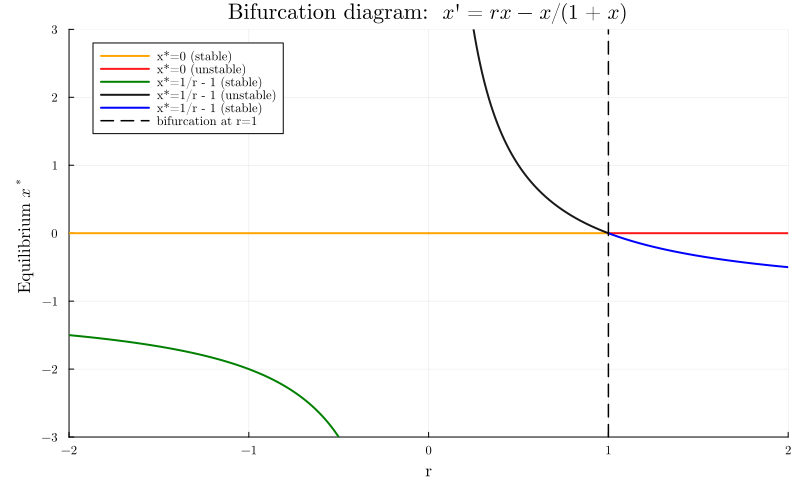

In [10]:
using Plots, LaTeXStrings

# ODE: x' = r*x - x/(1+x)
# Equilibria: x₁ = 0,  x₂ = 1/r - 1 (for r ≠ 0)
# Stability from f_x = r - 1/(1+x)^2:
#  - x=0:          stable if r < 1; unstable if r > 1
#  - x=1/r-1:      stable if r < 0 or r > 1; unstable if 0 < r < 1

# Ranges (skip r=0 to avoid blow-up of 1/r)
rmin, rmax = -2.0, 2.0
ε = 1e-3
rs_neg = range(rmin, -ε; length=800)
rs_pos = range(+ε, rmax; length=800)

# Equilibrium branches
x0_neg  = zeros(length(rs_neg))
x0_pos  = zeros(length(rs_pos))
x2_neg  = 1.0 ./ rs_neg .- 1.0
x2_pos  = 1.0 ./ rs_pos .- 1.0

# Plot setup
p = plot(; xlabel="r", ylabel="Equilibrium "*L"x^*",
          title="Bifurcation diagram:  "*L"x' = r x - x/(1+x)", fontfamily="Computer Modern",
          legend=:topleft, size=(800,480), xlim=(rmin, rmax), ylim=(-3, 3), leftmargin=5Plots.mm)

# --- x* = 0 branch ---
# stable for r < 1
rs0_stable_left  = range(rmin, min(1.0, -ε); length=400)
rs0_stable_right = isempty(rs_pos) ? Float64[] : range(ε, min(1.0, rmax); length=400)
if !isempty(rs0_stable_left)
    plot!(p, rs0_stable_left, zeros(length(rs0_stable_left)); label="x*=0 (stable)", color=:orange, linewidth=2)
end
if !isempty(rs0_stable_right)
    plot!(p, rs0_stable_right, zeros(length(rs0_stable_right)); label="", color=:orange, linewidth=2)
end

# unstable for r > 1
if rmax > 1
    rs0_unstable = range(max(1.0, ε), rmax; length=400)
    plot!(p, rs0_unstable, zeros(length(rs0_unstable)); label="x*=0 (unstable)", color=:red, linewidth=2, alpha=0.9)
end

# --- x* = 1/r - 1 branch ---
# r < 0: stable
plot!(p, rs_neg, x2_neg; label="x*=1/r - 1 (stable)", color=:green, linewidth=2)

# 0 < r < 1: unstable
if rmax > ε
    rs_mid = range(ε, min(1.0-1e-3, rmax); length=500)
    plot!(p, rs_mid, 1.0 ./ rs_mid .- 1.0; label="x*=1/r - 1 (unstable)", color=:black, linewidth=2, alpha=0.9)
end

# r > 1: stable
if rmax > 1
    rs_hi = range(1.0+1e-3, rmax; length=500)
    plot!(p, rs_hi, 1.0 ./ rs_hi .- 1.0; label="x*=1/r - 1 (stable)", color=:blue, linewidth=2)
end

# Vertical guide at the transcritical bifurcation r=1
plot!(p, [1.0, 1.0], [-3, 3]; label="bifurcation at r=1", color=:black, linewidth=1.5, linestyle=:dash)

display(p)


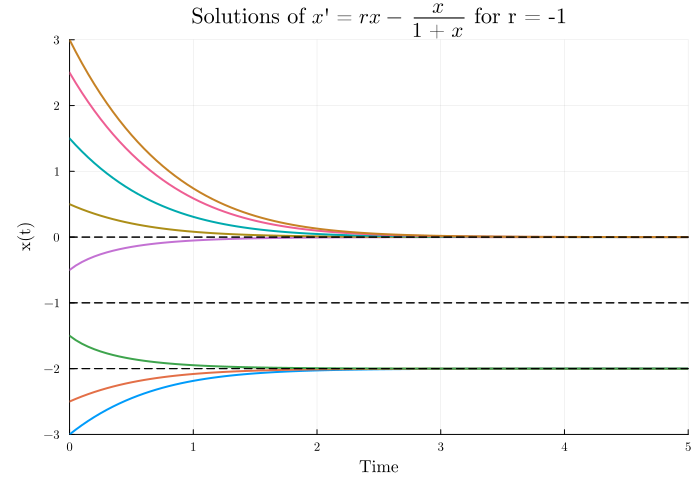

In [44]:
using DifferentialEquations
using Plots
gr()  # make sure the GR backend is active

# ODE
function ode!(du, u, p, t)
    r = p[1]
    x = u[1]
    du[1] = r*x - x/(1+x)
end

# Params / ICs / time grid
ics = [-3.0, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.0]
tspan = (0.0, 20.0)
t = range(tspan[1], tspan[2], length=400)

# Solve for each IC
sols = [solve(ODEProblem(ode!, [u0], tspan, [-1.0]), Tsit5(); saveat=t) for u0 in ics]

# Plot
plt = plot(
    xlabel="Time", ylabel="x(t)",
    title="Solutions of "*L"x' = rx - \frac{x}{1+x}"*" for r = -1",
    legend=false, size=(700,480), leftmargin=5Plots.mm, xlims = (0, 5), ylims = (-3, 3),
    fontfamily="Computer Modern"
)

for (i, sol) in enumerate(sols)
    y = getindex.(sol.u, 1)  # extract scalar x(t)
    plot!(plt, sol.t, y; label="u0=$(ics[i])", linewidth=2)
end

hline!(plt, [0, 20], [0, 0]; color=:black, linestyle=:dash, label="x=0")
hline!(plt, [0, 20], [-1, -1]; color=:black, linestyle=:dash, label="x=-1")
hline!(plt, [0, 20], [ -2, -2]; color=:black, linestyle=:dash, label="x=-2")
display(plt)                # shows in REPL/Jupyter/VS Code


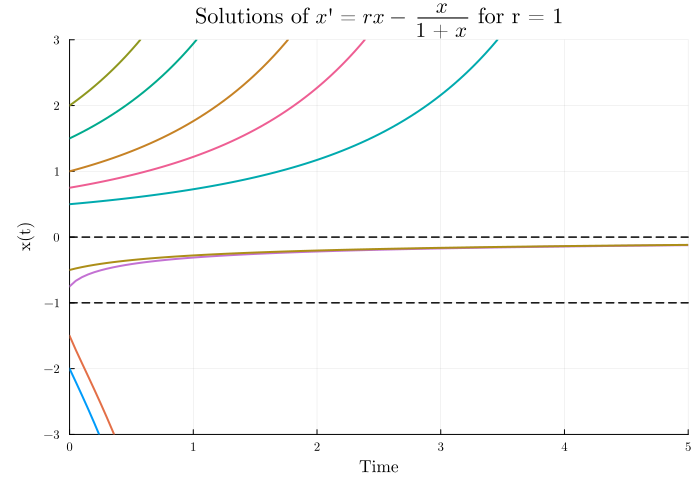

┌ Warning: At t=0.0, dt was forced below floating point epsilon 5.0e-324, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657


In [53]:
# Params / ICs / time grid
ics2 = [-2.0, -1.5, -1.0, -0.75, -0.5, 0.5, 0.75, 1.0, 1.5, 2.0]
tspan = (0.0, 20.0)
t = range(tspan[1], tspan[2], length=400)

# Solve for each IC
sols2 = [solve(ODEProblem(ode!, [u0], tspan, [1.0]), Tsit5(); saveat=t) for u0 in ics2]

# Plot
plt = plot(
    xlabel="Time", ylabel="x(t)",
    title="Solutions of "*L"x' = rx - \frac{x}{1+x}"*" for r = 1",
    legend=:false, size=(700,480), leftmargin=5Plots.mm, xlims = (0, 5), ylims = (-3, 3),
    fontfamily="Computer Modern"
)

for (i, sol) in enumerate(sols2)
    y = getindex.(sol.u, 1)  # extract scalar x(t)
    plot!(plt, sol.t, y; label="u0=$(ics2[i])", linewidth=2)
end

hline!(plt, [0, 20], [0, 0]; color=:black, linestyle=:dash, label="x=0")
hline!(plt, [0, 20], [-1, -1]; color=:black, linestyle=:dash, label="x=-1")

display(plt)                # shows in REPL/Jupyter/VS Code


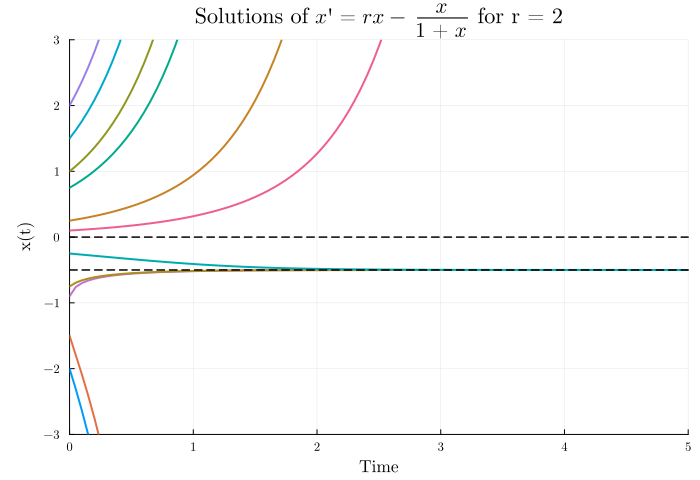

┌ Warning: At t=0.0, dt was forced below floating point epsilon 5.0e-324, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657


In [60]:
# Params / ICs / time grid
ics3 = [-2.0, -1.5, -1.0, -0.9, -0.75, -0.25, 0.1, 0.25, 0.75, 1.0, 1.5, 2.0]
tspan = (0.0, 20.0)
t = range(tspan[1], tspan[2], length=400)

# Solve for each IC
sols3 = [solve(ODEProblem(ode!, [u0], tspan, [2.0]), Tsit5(); saveat=t) for u0 in ics3]

# Plot
plt = plot(
    xlabel="Time", ylabel="x(t)",
    title="Solutions of "*L"x' = rx - \frac{x}{1+x}"*" for r = 2",
    legend=false, size=(700,480), leftmargin=5Plots.mm, xlims = (0, 5), ylims = (-3, 3),
    fontfamily="Computer Modern"
)

for (i, sol) in enumerate(sols3)
    y = getindex.(sol.u, 1)  # extract scalar x(t)
    plot!(plt, sol.t, y; label="u0=$(ics3[i])", linewidth=2)
end

hline!(plt, [0, 20], [0, 0]; color=:black, linestyle=:dash, label="x=0")
hline!(plt, [0, 20], [-0.5, -0.5]; color=:black, linestyle=:dash, label="x=-0.5")

display(plt)                # shows in REPL/Jupyter/VS Code


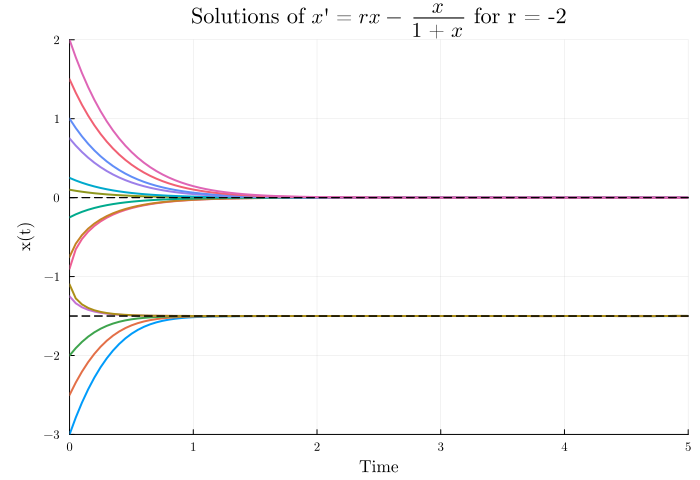

┌ Warning: At t=0.0, dt was forced below floating point epsilon 5.0e-324, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657


In [68]:
# Params / ICs / time grid
ics3 = [-3.0, -2.5, -2.0, -1.25, -1.1, -1.0, -0.9, -0.75, -0.25, 0.1, 0.25, 0.75, 1.0, 1.5, 2.0]
tspan = (0.0, 20.0)
t = range(tspan[1], tspan[2], length=400)

# Solve for each IC
sols3 = [solve(ODEProblem(ode!, [u0], tspan, [-2.0]), Tsit5(); saveat=t) for u0 in ics3]

# Plot
plt = plot(
    xlabel="Time", ylabel="x(t)",
    title="Solutions of "*L"x' = rx - \frac{x}{1+x}"*" for r = -2",
    legend=false, size=(700,480), leftmargin=5Plots.mm, xlims = (0, 5), ylims = (-3, 2),
    fontfamily="Computer Modern"
)

for (i, sol) in enumerate(sols3)
    y = getindex.(sol.u, 1)  # extract scalar x(t)
    plot!(plt, sol.t, y; label="u0=$(ics3[i])", linewidth=2)
end

hline!(plt, [0, 20], [0, 0]; color=:black, linestyle=:dash, label="x=0")
hline!(plt, [0, 20], [-1.5, -1.5]; color=:black, linestyle=:dash, label="x=-0.5")

display(plt)                # shows in REPL/Jupyter/VS Code


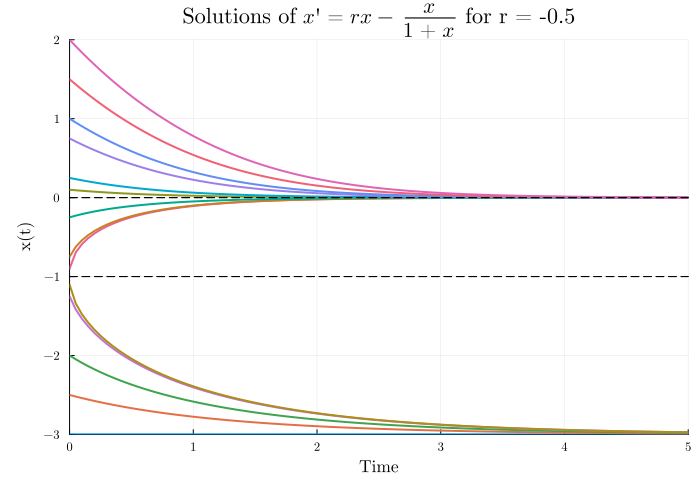

┌ Warning: At t=0.0, dt was forced below floating point epsilon 5.0e-324, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase /Users/rafif/.julia/packages/SciMLBase/YbbI1/src/integrator_interface.jl:657


In [75]:
# Params / ICs / time grid
ics3 = [-3.0, -2.5, -2.0, -1.25, -1.1, -1.0, -0.9, -0.75, -0.25, 0.1, 0.25, 0.75, 1.0, 1.5, 2.0]
tspan = (0.0, 20.0)
t = range(tspan[1], tspan[2], length=400)

# Solve for each IC
sols3 = [solve(ODEProblem(ode!, [u0], tspan, [-0.5]), Tsit5(); saveat=t) for u0 in ics3]

# Plot
plt = plot(
    xlabel="Time", ylabel="x(t)",
    title="Solutions of "*L"x' = rx - \frac{x}{1+x}"*" for r = -0.5",
    legend=false, size=(700,480), leftmargin=5Plots.mm, xlims = (0, 5), ylims = (-3, 2),
    fontfamily="Computer Modern"
)

for (i, sol) in enumerate(sols3)
    y = getindex.(sol.u, 1)  # extract scalar x(t)
    plot!(plt, sol.t, y; label="u0=$(ics3[i])", linewidth=2)
end

hline!(plt, [0, 20], [0, 0]; color=:black, linestyle=:dash, label="x=0")
hline!(plt, [0, 20], [-1, -1]; color=:black, linestyle=:dash, label="x=-1")

display(plt)                # shows in REPL/Jupyter/VS Code
